In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
df = pd.read_csv("data/dirty_cafe_sales 2.csv", low_memory=False)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [111]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


Konvertierung von object in number

In [112]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

Konvertierung von Total Spent in number

In [113]:
df['Total Spent'] = df['Total Spent'].replace("ERROR", np.nan)
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9667 non-null   object 
 2   Quantity          9521 non-null   float64
 3   Price Per Unit    9821 non-null   object 
 4   Total Spent       9498 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(2), object(6)
memory usage: 625.1+ KB


Konvertierung der anderen Datentypen

In [114]:
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df['Price Per Unit'] = df['Price Per Unit'].fillna((df['Total Spent'] / df['Quantity']).round(2))
df['Total Spent'] = df['Total Spent'].fillna((df['Price Per Unit'] * df['Quantity']).round(2))
df['Quantity'] = df['Quantity'].fillna((df['Total Spent'] / df['Price Per Unit']).round(2))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9667 non-null   object        
 2   Quantity          9962 non-null   float64       
 3   Price Per Unit    9962 non-null   float64       
 4   Total Spent       9960 non-null   float64       
 5   Payment Method    7421 non-null   object        
 6   Location          6735 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


Analyse von Ausreißern bei Quantity und Total Spent

In [115]:
df['Total Spent'].describe()

count    9960.000000
mean        8.930924
std         6.004475
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        25.000000
Name: Total Spent, dtype: float64

<Axes: xlabel='Total Spent'>

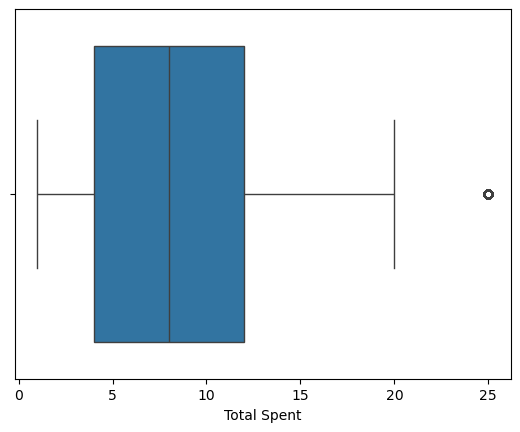

In [116]:
sns.boxplot(x=df["Total Spent"])


<Axes: xlabel='Quantity'>

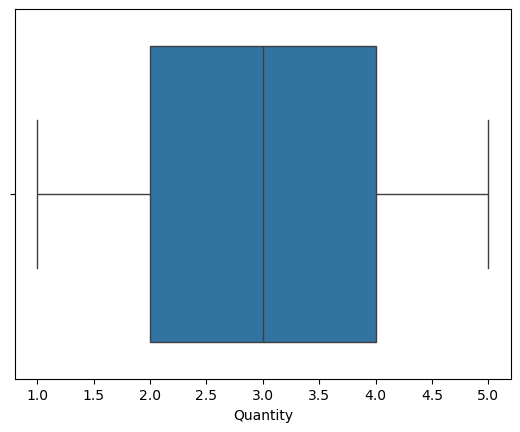

In [117]:
sns.boxplot(x=df["Quantity"])


In [118]:
df['Payment Method'].unique()
df['Location'].unique()

array(['Takeaway', 'In-store', 'UNKNOWN', nan, 'ERROR'], dtype=object)

Data Cleaning

In [119]:
df['Payment Method'] = df['Payment Method'].replace("ERROR", np.nan)
df['Payment Method'] = df['Payment Method'].replace("UNKNOWN", np.nan)

In [120]:
df['Location'] = df['Location'].replace("ERROR", np.nan)
df['Location'] = df['Location'].replace("UNKNOWN", np.nan)

In [121]:
df['Item'] = df['Item'].replace("ERROR", np.nan)
df['Item'] = df['Item'].replace("UNKNOWN", np.nan)

In [122]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [123]:
product_prices = df[['Item', 'Price Per Unit']].drop_duplicates()
product_prices.head()

,Item,Price Per Unit
0,Coffee,2.0
1,Cake,3.0
2,Cookie,1.0
3,Salad,5.0
5,Smoothie,4.0


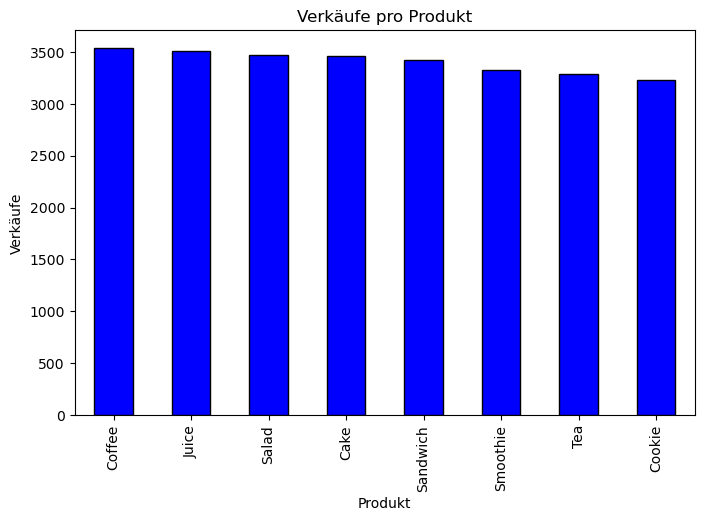

In [124]:
group = df.groupby("Item")["Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
group.plot(kind="bar", color="blue", edgecolor="black")
plt.title("Verkäufe pro Produkt")
plt.xlabel("Produkt")
plt.ylabel("Verkäufe")
plt.show()

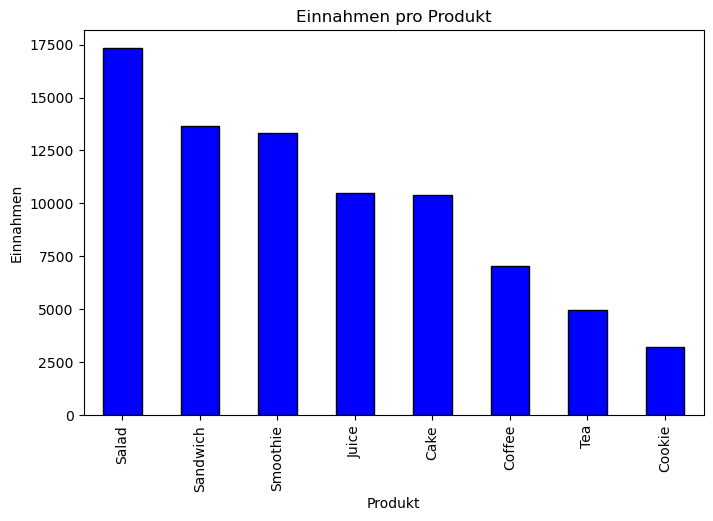

In [125]:
group = df.groupby("Item")["Total Spent"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
group.plot(kind="bar", color="blue", edgecolor="black")
plt.title("Einnahmen pro Produkt")
plt.xlabel("Produkt")
plt.ylabel("Einnahmen")
plt.show()

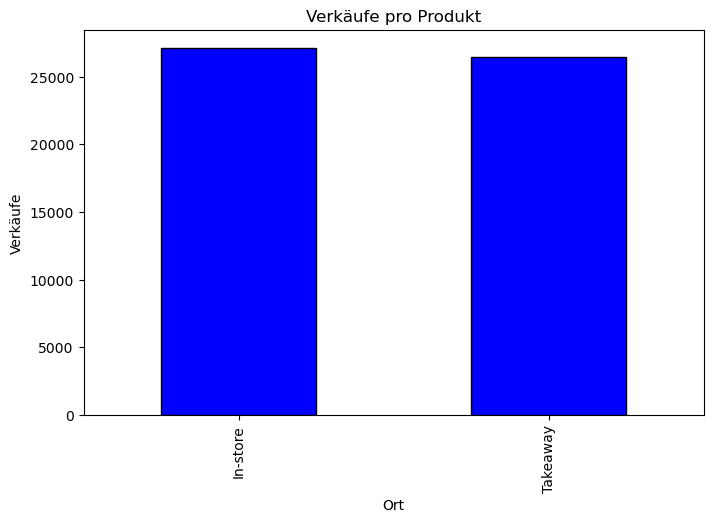

In [126]:
location = df.groupby("Location")["Total Spent"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
location.plot(kind="bar", color="blue", edgecolor="black")
plt.title("Verkäufe pro Produkt")
plt.xlabel("Ort")
plt.ylabel("Verkäufe")
plt.show()

Konvertierung Jahr und Monat

In [127]:
df['year'] = df['Transaction Date'].dt.year
df['month'] = df['Transaction Date'].dt.month
df['month'].unique()

array([ 9.,  5.,  7.,  4.,  6.,  3., 10., 12., 11., nan,  2.,  1.,  8.])

Einnahmen im Jahr

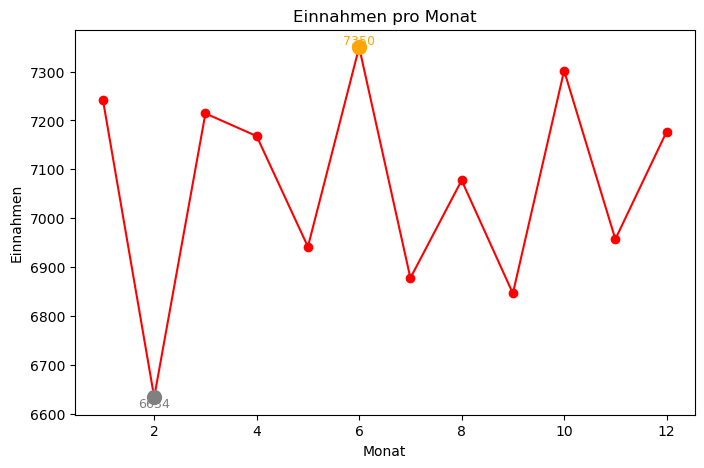

In [128]:
# Einnahmen pro Monat berechnen
location = df.groupby("month")["Total Spent"].sum()

# Min- und Max-Werte finden
max_month = location.idxmax()
max_value = location.max()
min_month = location.idxmin()
min_value = location.min()

# Plot erstellen
plt.figure(figsize=(8,5))
plt.plot(location.index, location.values, color="red", marker='o', linestyle='-')
plt.title("Einnahmen pro Monat")
plt.xlabel("Monat")
plt.ylabel("Einnahmen")

# Maximalwert markieren
plt.scatter(max_month, max_value, color="orange", s=100, zorder=5)
plt.text(max_month, max_value, f"{max_value:.0f}", ha="center", va="bottom", fontsize=9, color="orange")

# Minimalwert markieren
plt.scatter(min_month, min_value, color="grey", s=100, zorder=5)
plt.text(min_month, min_value, f"{min_value:.0f}", ha="center", va="top", fontsize=9, color="grey")

plt.show()

Kaufverhalten nach Location

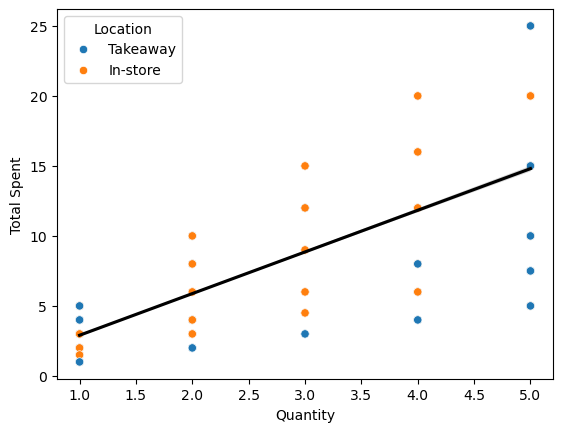

In [129]:
x = df['Quantity']
y = df['Total Spent']
sns.scatterplot(data=df, x='Quantity', y='Total Spent', hue='Location')
sns.regplot(data=df, x='Quantity', y='Total Spent', scatter=False, color="black", line_kws={"label": "Trend gesamt"})
plt.show()

Kaufverhalten nach Zahlmethode

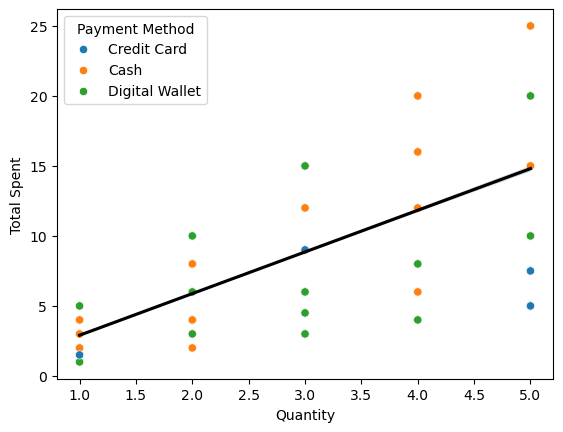

In [130]:
x = df['Quantity']
y = df['Total Spent']
sns.scatterplot(data=df, x='Quantity', y='Total Spent', hue='Payment Method')
sns.regplot(data=df, x='Quantity', y='Total Spent', scatter=False, color="black", line_kws={"label": "Trend gesamt"})
plt.show()

Fazit

- Verkaufszahlen sind über fast alle Produkte hinweg stabil (3.200–3.600 Verkäufe).

- Coffee liegt leicht vorne, Cookie bildet das Schlusslicht.

- Höchste Einnahmen durch Salad, Sandwich und Smoothie → Preis spielt größere Rolle als Verkaufszahl.

- Coffee, Tea und Cookies bringen trotz hoher Nachfrage nur geringe Umsätze.

- Höhere Ausgaben bei In-Store Käufen

- Höhere Ausgaben mit Cash oder Digital Wallet als mit Credit Card

- Monatliche Einnahmen liegen stabil bei ~7.000 €, schwächster Monat Februar (6.600 €), stärkster Monat Juni (7.350 €).

Handlungsempfehlungen

- Fokus auf margenstarke Produkte (Salad, Sandwich, Smoothie) legen und gezielt bewerben.

- Günstige Produkte (Coffee, Cookie, Tea) verstärkt in Bundles oder Upselling einsetzen, um Warenkorbwert zu steigern.

- Saisonale Schwankungen (Februar) mit Promotions oder zeitlich begrenzten Angeboten abfedern.

- Attraktive Bundle- oder Familienangebote schaffen, um hohe Einzelausgaben gezielt zu fördern.

- Schöne Inneneinrichtung und gute Sitzmöglichkeiten gestalten für das Fördern höherer Ausgaben